In [3]:
'''Compares ML and subject 
saves "_beh.hdf.mat" and several figures
**Requires behavioral, session 1 and 2**
behavioral -> beh_collect.ipynb'''
'''For the feature select trials'''
from scipy.stats import beta
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import ast
import matplotlib.pyplot as plt
import os
from hdf5storage import loadmat, savemat
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay




'''Bar graphs of proportion of features used by feat select'''
def propPlt(feat_count,correct,title,fn):
    data = feat_count
    names = list(data.keys())
    values = list(data.values())
    plt.gcf().set_size_inches(16, 8)
    plt.grid(visible=True)
    plt.bar(range(len(data)), values, tick_label=names)
    if correct:
        title += ' (Correct)'
    plt.title(title)
    plt.savefig(fn)
    plt.show()
    
def subMLdesc(humanPerf,mlPerf,correct):
    humancr = np.where(humanPerf == correct)[0].shape[0]
    mlcr = np.where(mlPerf == correct)[0].shape[0]
    humancro = np.where((humanPerf == correct) & (humanPerf != mlPerf))[0].shape[0] ### number of trials where human was only correct
    mlcro = np.where((mlPerf == correct) & (humanPerf != mlPerf))[0].shape[0] ### number of trials where ML was only correct
    anycr = np.where((humanPerf == correct)|(mlPerf==correct))[0].shape[0] ### number of correct trials
    poscr = humanPerf.shape[0] ##possible values
    print(f'Subject {sub} correct {humancr} / {poscr} ({humancr/poscr*100:.2f}%)\nMachine Learning correct {mlcr} / {poscr} ({mlcr/poscr*100:.2f}%)\nCorrect Together {anycr} / {poscr} ({anycr/poscr*100:.2f}%)\nSubject {sub} correct only of all correct: {humancro} / {anycr} ({humancro/anycr*100:.2f}%)\nMachine Learning correct only of all correct: {mlcro} / {anycr} ({mlcro/anycr*100:.2f}%)\n')
    

['../data/Subject105/105Session1/105_2023_Nov_02_1030_block3_ses1_secGO.csv', '../data/Subject105/105Session2/105_2023_Nov_03_0947_block3_ses2_secGO.csv']


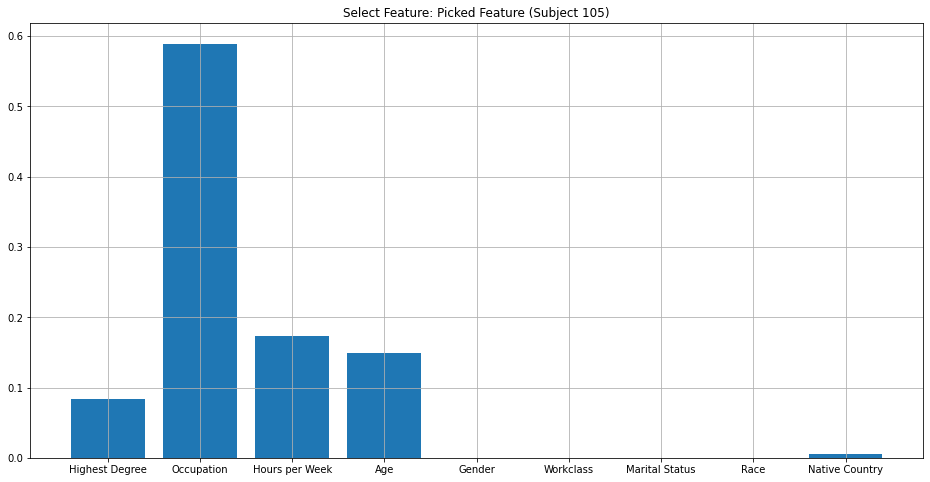

Percent Correct from all features 0.68
Percent Correct from feature select 0.67
Subject 105 correct 296 / 434 (68.20%)
Machine Learning correct 304 / 434 (70.05%)
Correct Together 361 / 434 (83.18%)
Subject 105 correct only of all correct: 57 / 361 (15.79%)
Machine Learning correct only of all correct: 65 / 361 (18.01%)

105Full_beh.hdf


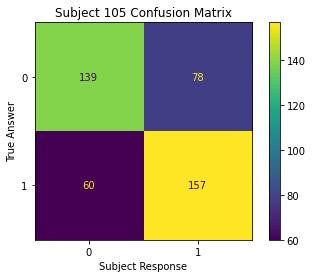

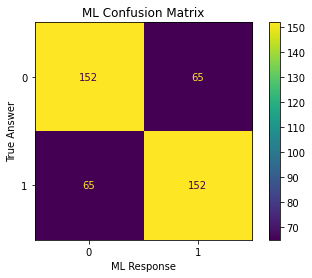

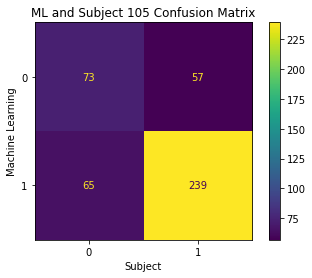

In [4]:
sub = '105'
ses = '2'
subl = str(int(sub))
both = True ## uses both sessions if True, only 'ses' if False


subc = []
subw = []
mlc = []
mlw = []
if both:
    files = []
    for s in [1,2]:
        path = f'../data/Subject{sub}/{sub}Session{s}/'
        file = [f for f in os.listdir(path) if sub in f and 'csv' in f and 'ses'+str(s) in f and '#' not in f and 'block3' in f][0]
        files.append(path+file)
    print(files)
    fil = pd.read_csv(files[0])### first session
    fil2 = pd.read_csv(files[1]) ### second session
    fil = pd.concat([fil,fil2],ignore_index = True) #concatenate the two dataframes
else:
    path = f'../data/Subject{sub}/{sub}Session{ses}/'
    file = [f for f in os.listdir(path) if sub in f and 'csv' in f and 'ses'+str(ses) in f and '#' not in f and 'block3' in f][0]
    fil = pd.read_csv(path + file)
    
path = f'../data/Subject{sub}/{sub}_Session_{ses}_Dataset.csv'
if both:
    path = f'../data/Subject{sub}/Subject{sub}Full.csv'
eegfil = pd.read_csv(path)



countPick = {'Highest Degree': 0, 'Occupation': 0, 'Hours per Week': 0, 'Age': 0, 'Gender': 0, 'Workclass': 0, 'Marital Status': 0, 'Race': 0, 'Native Country': 0}
percFS = 0
total = 0
#print(len(inds))
for i in fil['Experiment Data']:
    i = ast.literal_eval(i)
    if i['Stim Type'] == 'response' and i['Block'] != 'train' and 'Feats Used' in i:
        for k,j in enumerate(i['All Features']):
            if k == 3:
                countPick[j] += 1
        total += 1
        if i['Correct']:
            percFS += 1
for i in countPick:
    countPick[i] /= total
    
fn = f'../data/Subject{sub}/Subject{sub}Ses{ses}_FeatSelect.png'
title = f'Select Feature: Picked Feature (Subject {subl} Session {ses})'
if both:
    fn = f'../data/Subject{sub}/Subject{sub}SesFull_FeatSelect.png'
    title = f'Select Feature: Picked Feature (Subject {subl})'

propPlt(countPick,False, title,fn) ### plot features selected

#fil.to_csv(f'Subject{sub}Full.csv')
humanPerf = np.array(eegfil['Response'])
mlPerf = np.array(eegfil['Model'])
correct = np.array(eegfil['Real Answer'])
indarray = np.array(eegfil['Original Ind'])

## remove no response
indarray = indarray[np.where(humanPerf != -1)]
correct = correct[np.where(humanPerf != -1)]
mlPerf = mlPerf[np.where(humanPerf != -1)]
humanPerf = humanPerf[np.where(humanPerf != -1)]

subc = indarray[np.where(humanPerf == correct)]
subw = indarray[np.where(humanPerf != correct)]
mlc = indarray[np.where(mlPerf == correct)]
mlw = indarray[np.where(mlPerf != correct)]
subunique = indarray[np.where((humanPerf == correct) & (mlPerf != correct))]
mlunique = indarray[np.where((humanPerf != correct) & (mlPerf == correct))]

humCor = humanPerf.copy()
humCor[np.where(correct == humanPerf)] = 1
humCor[np.where(correct != humanPerf)] = 0

mlCor = mlPerf.copy()
mlCor[np.where(correct == mlPerf)] = 1
mlCor[np.where(correct != mlPerf)] = 0
    
print(f'Percent Correct from all features {np.where(humanPerf == correct)[0].shape[0]/humanPerf.shape[0]:.2f}')
print(f'Percent Correct from feature select {percFS/total:.2f}')

humanPerf = np.array(humanPerf)
mlPerf = np.array(mlPerf)

myKeys = list(countPick.keys())
myKeys.sort()
sorted_dict = {i: countPick[i] for i in myKeys}
countPick = sorted_dict


subcm = confusion_matrix(correct, humanPerf)
cm_display = ConfusionMatrixDisplay(subcm).plot()
fn = f'../data/Subject{sub}/Sub{sub}SS{ses}CM.png'
plt.ylabel('True Answer')
plt.xlabel('Subject Response')
plt.title(f'Subject {subl} Confusion Matrix {ses}')
if both:
    plt.title(f'Subject {subl} Confusion Matrix')
    fn = f'../data/Subject{sub}/Sub{sub}CM.png'
plt.savefig(fn,format = 'png')

mlcm = confusion_matrix(correct, mlPerf)
cm_display = ConfusionMatrixDisplay(mlcm).plot()
plt.title('ML Confusion Matrix')
plt.ylabel('True Answer')
plt.xlabel('ML Response')
fn = f'../data/Subject{sub}/ML{sub}SS{ses}CM.png'
if both:
    fn = f'../data/Subject{sub}/ML{sub}CM.png'
plt.savefig(fn,format = 'png')

cocm = confusion_matrix(mlCor, humCor)
cm_display = ConfusionMatrixDisplay(cocm).plot()
plt.title(f'ML and Subject {subl} Confusion Matrix')
plt.ylabel('Machine Learning')
plt.xlabel('Subject')
fn = f'../data/Subject{sub}/CombinedML{sub}SS{ses}CM.png'
if both:
    fn = f'../data/Subject{sub}/CombinedML{sub}CM.png'
plt.savefig(fn,format = 'png', bbox_inches="tight")
subMLdesc(humanPerf,mlPerf,correct)
subbeh = {}
subbeh['Feature Count'] = countPick
subbeh['Human Perf'] = humanPerf
subbeh['ML Perf'] = mlPerf
subbeh['Subject Correct Indices'] = subc
subbeh['Subject Wrong Indices'] = subw
subbeh['ML Correct Indices'] = mlc
subbeh['ML Wrong Indices'] = mlw
subbeh['Subject Unique Correct'] = subunique
subbeh['ML Unique Correct'] = mlunique
subbeh['Correct Answers'] = correct
subbeh['Sub CM'] = subcm
subbeh['ML CM'] = mlcm
subbeh['Comb CM'] = cocm
subbeh['Perc feat'] = percFS
subbeh['Feat Total'] = total
subbeh['Ind Array'] = indarray

outpath = f'../data/Subject{sub}/'
outname = f'{sub}SS{ses}_beh.hdf'
if both:
    outname = f'{sub}Full_beh.hdf'
print(outname)
savemat(outpath+outname,subbeh,store_python_metadata=True)